<a href="https://colab.research.google.com/github/shin0105/4YP/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GPyOpt --quiet
!pip install GPy --quiet

In [3]:
#import packages

#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

#Bayesian optimization packages
import GPy
import GPyOpt

#ML Algorithm packages
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import preprocessing

In [4]:
#dataset = UCI Car Evaluation
names=['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('car.data', names = names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
#frequency distribution
for col in names: 
    print(df[col].value_counts())

#replacing ? into NaT
df=df.replace('?',pd.NaT)

#checking missing values
df.isnull().sum()

In [ ]:
#dropping rows with missing values
df=df.dropna()
print(df.isnull().sum())

In [7]:
#Convert categorical labels to numbers
le = preprocessing.LabelEncoder()

for col in names: 
  df[col] = le.fit_transform(df[col])

In [8]:
X = df.drop(['class'], axis=1)
y = df['class']

#splitting train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
#K-fold validation
def kfold_score(clf,X,y,n_fold):
    X,y = X.values,y.values
    kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)
    accuracy_list = []

    for train_index, test_index in kfold.split(X, y):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf.fit(x_train_fold, y_train_fold)
        preds = clf.predict(x_test_fold)
        accuracy_test = accuracy_score(preds,y_test_fold)
        accuracy_list.append(accuracy_test)
    return np.array(accuracy_list).mean()

In [11]:
#Random Forest classification

#max_features: 1 to around sqrt(# of features of dataset)
bounds = [
        {'name': 'max_features', 'type': 'continuous', 'domain': (1, 5)},
        {'name': 'n_estimators', 'type': 'continuous', 'domain': (1, 200)}
      ]

def rf_score(parameters):
  params = {
        'max_features':int(parameters[0][0]),
        'n_estimators':int(parameters[0][1])
    }
  
  clf = RandomForestClassifier(max_features=params['max_features'],n_estimators=params['n_estimators'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)
  return score

In [27]:
import numpy as np

arr1 = np.array([1, 2, 3])
col_vector = np.column_stack([arr1])

arr2 = np.array([4, 5, 6])
arr2 = np.column_stack([arr2])
arr = np.hstack((col_vector, arr2))
print(arr)

[[1 4]
 [2 5]
 [3 6]]


In [38]:
p1=[1,2,3,4,5]
p2=np.linspace(1,200,51)
p1list=[]
p2list=[]
scorelist=[]
for i in range(len(p1)):
  for j in range(len(p2)):
    clf = RandomForestClassifier(max_features=p1[i],n_estimators=int(p2[j]))
    clf.fit(X_train,y_train)
    score = kfold_score(clf,X_train, y_train,10)
    p1list.append(p1[i])
    p2list.append(int(p2[j]))
    scorelist.append(score)

p1list_ = np.column_stack([p1list])
p2list_ = np.column_stack([p2list])
scorelist_ = np.column_stack([scorelist])

In [42]:
X=np.hstack((p1list_,p2list_))
Y=scorelist_

In [109]:
kernel1 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel = kernel1 + kernel2 + kernel3
m = GPy.models.GPRegression(X, Y, kernel)

In [110]:
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,1.0,+ve,
sum.Mat52_1.variance,1.0,+ve,
sum.Mat52_1.lengthscale,1.0,+ve,
sum.mul.Mat52.variance,1.0,+ve,
sum.mul.Mat52.lengthscale,1.0,+ve,
sum.mul.Mat52_1.variance,1.0,+ve,
sum.mul.Mat52_1.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


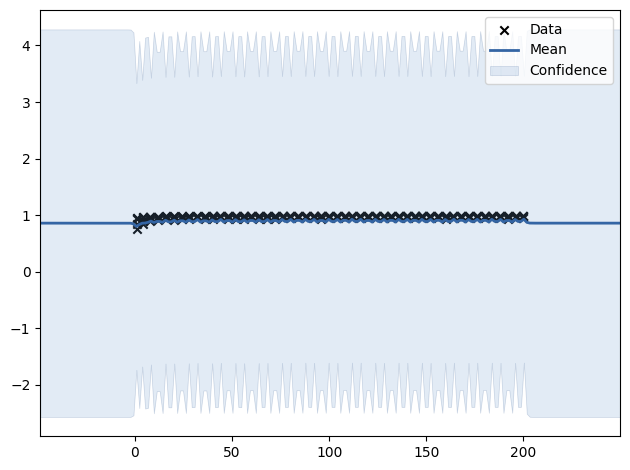

In [104]:
_ = m.plot(fixed_inputs=[(0, 1)])

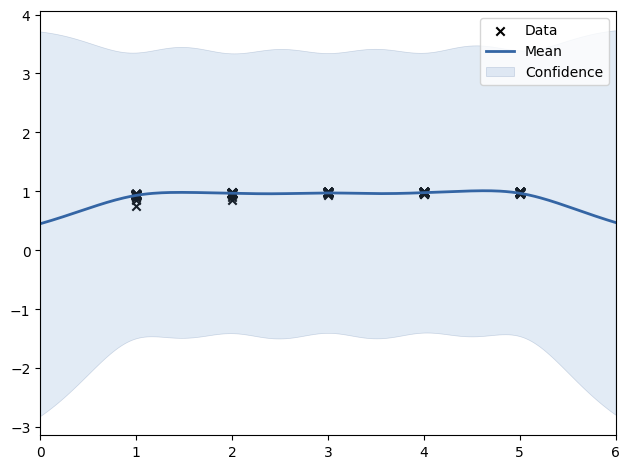

In [105]:
_ = m.plot(fixed_inputs=[(1, 100)])

In [111]:
m.optimize()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.5041844536635015,+ve,
sum.Mat52.lengthscale,20.46288126027391,+ve,
sum.Mat52_1.variance,6.4414307867102566e-12,+ve,
sum.Mat52_1.lengthscale,1.8900722524238482,+ve,
sum.mul.Mat52.variance,0.23828637533510325,+ve,
sum.mul.Mat52.lengthscale,6.47778057714575,+ve,
sum.mul.Mat52_1.variance,0.23828637639398112,+ve,
sum.mul.Mat52_1.lengthscale,43.903989274134744,+ve,
Gaussian_noise.variance,1.1164240049052876e-05,+ve,


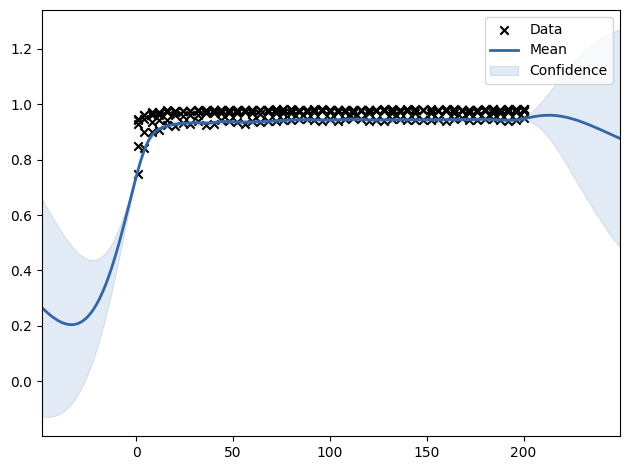

In [76]:
_ = m.plot(fixed_inputs=[(0, 1)])

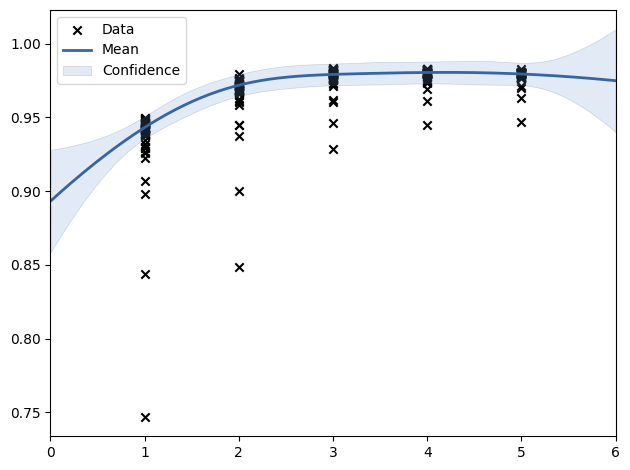

In [77]:
_ = m.plot(fixed_inputs=[(1, 100)])

In [92]:
kernel1 = GPy.kern.Matern52(input_dim=1,variance=2,lengthscale=1.1,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=3,lengthscale=1.2,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=4,lengthscale=1.3,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=5,lengthscale=1.4,active_dims=[1])
kernel = kernel1 + kernel2 + kernel3
m = GPy.models.GPRegression(X, Y, kernel)
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,2.0,+ve,
sum.Mat52.lengthscale,1.1,+ve,
sum.Mat52_1.variance,3.0,+ve,
sum.Mat52_1.lengthscale,1.2,+ve,
sum.mul.Mat52.variance,4.0,+ve,
sum.mul.Mat52.lengthscale,1.3,+ve,
sum.mul.Mat52_1.variance,5.0,+ve,
sum.mul.Mat52_1.lengthscale,1.4,+ve,
Gaussian_noise.variance,1.0,+ve,


In [87]:
kernel1 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel = kernel1 + kernel2 + kernel3
m = GPy.models.GPRegression(X, Y, kernel)

In [93]:
m.Gaussian_noise[:] = 0.01
m.Gaussian_noise.fix()
m.sum.mul.Mat52_1.variance[:]=1
m.sum.mul.Mat52_1.variance.fix()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,2.0,+ve,
sum.Mat52.lengthscale,1.1,+ve,
sum.Mat52_1.variance,3.0,+ve,
sum.Mat52_1.lengthscale,1.2,+ve,
sum.mul.Mat52.variance,4.0,+ve,
sum.mul.Mat52.lengthscale,1.3,+ve,
sum.mul.Mat52_1.variance,1.0,+ve fixed,
sum.mul.Mat52_1.lengthscale,1.4,+ve,
Gaussian_noise.variance,0.01,+ve fixed,


In [94]:
m.optimize()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.9008488313495786,+ve,
sum.Mat52.lengthscale,128.5948021216628,+ve,
sum.Mat52_1.variance,3.963224590724891e-13,+ve,
sum.Mat52_1.lengthscale,1.3988975872049065,+ve,
sum.mul.Mat52.variance,3.4555023869323625e-18,+ve,
sum.mul.Mat52.lengthscale,37.45675916825969,+ve,
sum.mul.Mat52_1.variance,1.0,+ve fixed,
sum.mul.Mat52_1.lengthscale,2.3559191192991467,+ve,
Gaussian_noise.variance,0.01,+ve fixed,


In [95]:
kernel1 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel = kernel1 + kernel2 + kernel3
m = GPy.models.GPRegression(X, Y, kernel)

In [98]:
m.Gaussian_noise[:] = 0.01
m.Gaussian_noise.fix()
m.sum.Mat52.variance[:]=1
m.sum.Mat52.variance.fix()
m.sum.Mat52_1.variance[:]=1
m.sum.Mat52_1.variance.fix()
m.sum.mul.Mat52.variance[:]=1
m.sum.mul.Mat52.variance.fix()
m.sum.mul.Mat52_1.variance[:]=1
m.sum.mul.Mat52_1.variance.fix()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve fixed,
sum.Mat52.lengthscale,1.0,+ve,
sum.Mat52_1.variance,1.0,+ve fixed,
sum.Mat52_1.lengthscale,1.0,+ve,
sum.mul.Mat52.variance,1.0,+ve fixed,
sum.mul.Mat52.lengthscale,1.0,+ve,
sum.mul.Mat52_1.variance,1.0,+ve fixed,
sum.mul.Mat52_1.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.01,+ve fixed,


In [99]:
m.optimize()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve fixed,
sum.Mat52.lengthscale,18638.66770213027,+ve,
sum.Mat52_1.variance,1.0,+ve fixed,
sum.Mat52_1.lengthscale,13824.384617852387,+ve,
sum.mul.Mat52.variance,1.0,+ve fixed,
sum.mul.Mat52.lengthscale,48574.01199707606,+ve,
sum.mul.Mat52_1.variance,1.0,+ve fixed,
sum.mul.Mat52_1.lengthscale,20719.603826046845,+ve,
Gaussian_noise.variance,0.01,+ve fixed,


In [100]:
kernel1 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=1,active_dims=[1])
kernel = kernel1 + kernel2 + kernel3
m = GPy.models.GPRegression(X, Y, kernel)
m.Gaussian_noise[:] = 0.01
m.Gaussian_noise.fix()
m.sum.Mat52.lengthscale[:]=1
m.sum.Mat52.lengthscale.fix()
m.sum.Mat52_1.lengthscale[:]=1
m.sum.Mat52_1.lengthscale.fix()
m.sum.mul.Mat52.lengthscale[:]=1
m.sum.mul.Mat52.lengthscale.fix()
m.sum.mul.Mat52_1.lengthscale[:]=1
m.sum.mul.Mat52_1.lengthscale.fix()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,1.0,+ve fixed,
sum.Mat52_1.variance,1.0,+ve,
sum.Mat52_1.lengthscale,1.0,+ve fixed,
sum.mul.Mat52.variance,1.0,+ve,
sum.mul.Mat52.lengthscale,1.0,+ve fixed,
sum.mul.Mat52_1.variance,1.0,+ve,
sum.mul.Mat52_1.lengthscale,1.0,+ve fixed,
Gaussian_noise.variance,0.01,+ve fixed,


In [101]:
m.optimize()
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.48233871612301915,+ve,
sum.Mat52.lengthscale,1.0,+ve fixed,
sum.Mat52_1.variance,3.742417541431611e-11,+ve,
sum.Mat52_1.lengthscale,1.0,+ve fixed,
sum.mul.Mat52.variance,2.0996567126385164e-06,+ve,
sum.mul.Mat52.lengthscale,1.0,+ve fixed,
sum.mul.Mat52_1.variance,2.0996567126385164e-06,+ve,
sum.mul.Mat52_1.lengthscale,1.0,+ve fixed,
Gaussian_noise.variance,0.01,+ve fixed,


In [ ]:
kernel1 = GPy.kern.Matern52(input_dim=1,variance=1.44,lengthscale=1.167,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=6.402798748080808e-05	,lengthscale=0.006454006390038776	,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=0.1650,lengthscale=0.0687,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=0.374,lengthscale=0.386,active_dims=[1])
kernel = kernel1 + kernel2 + kernel3

optimizer = GPyOpt.methods.BayesianOptimization(f=rf_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )
optimizer.run_optimization(max_iter=20)
optimizer.plot_convergence()

GP_regression.,value,constraints,priors
sum.Mat52.variance,3.3951278139634327,+ve,
sum.Mat52.lengthscale,1.7385846723949965,+ve,
sum.Mat52_1.variance,0.5941089470772597,+ve,
sum.Mat52_1.lengthscale,22.22889924536197,+ve,
sum.mul.Mat52.variance,0.07260355732726041,+ve,
sum.mul.Mat52.lengthscale,1.2548711579476786,+ve,
sum.mul.Mat52_1.variance,0.04742411835251679,+ve,
sum.mul.Mat52_1.lengthscale,0.5333698661461721,+ve,
Gaussian_noise.variance,1.4656725718161681e-09,"1e-09,1000000.0",


In [ ]:
optimizer.model.model.optimize()
x=optimizer.X
y=optimizer.Y

In [ ]:
optimizer.model.model.sum.Mat52.lengthscale[:]=0.1
optimizer.model.model

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.1,+ve,
sum.Mat52.lengthscale,0.1,+ve,
sum.Mat52_1.variance,0.5941273979344206,+ve,
sum.Mat52_1.lengthscale,22.22887278583215,+ve,
sum.mul.Mat52.variance,0.07260668603957474,+ve,
sum.mul.Mat52.lengthscale,1.2548127641820248,+ve,
sum.mul.Mat52_1.variance,0.04742621359049051,+ve,
sum.mul.Mat52_1.lengthscale,0.5334373268970514,+ve,
Gaussian_noise.variance,1.465672473749178e-09,"1e-09,1000000.0",


In [ ]:
print(log_mll)
optimizer.model.model.log_likelihood()

[[-2.02274089]]


-23.09388770202723

In [ ]:
f_true = GPyOpt.objective_examples.experiments1d.forrester()             # true function object
f_sim = GPyOpt.objective_examples.experiments1d.forrester(sd=.1)        # noisy version

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]  # problem constraints 
f_objective = f_sim.f                                         # objective function   
n = 8
x = np.random.rand(n).reshape(n,1)
myBopt = GPyOpt.methods.BayesianOptimization(f = f_objective,        # function to optimize       
                                             domain = bounds,        # box-constraints of the problem
                                             acquisition_type ='EI') # acquisition = Expected improvement

myBopt.model.model

In [ ]:
max_iter = 5                 # evaluation budget
myBopt.run_optimization(max_iter)   # run optimization 
myBopt.model.model.plot_data()

GP_regression.,value,constraints,priors
Mat52.variance,5.7442289053621245,+ve,
Mat52.lengthscale,0.22741128406690353,+ve,
Gaussian_noise.variance,0.0009819723155152942,"1e-09,1000000.0",


In [ ]:
myBopt.model.model

GP_regression.,value,constraints,priors
Mat52.variance,5.7442289053621245,+ve,
Mat52.lengthscale,0.22741128406690353,+ve,
Gaussian_noise.variance,0.0009819723155152942,"1e-09,1000000.0",


In [ ]:
def BO(model,kernel):
  optimizer = GPyOpt.methods.BayesianOptimization(f=model, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )
  optimizer.run_optimization(max_iter=100)
  #maximum accuracy score
  acc_max=optimizer.fx_opt
  #best parameters
  params_best=optimizer.x_opt
  print(acc_max)
  print(params_best)
  optimizer.plot_convergence()
  optimizer.plot_acquisition()

-0.9636029411764706
[  7.86045418 161.76451672]


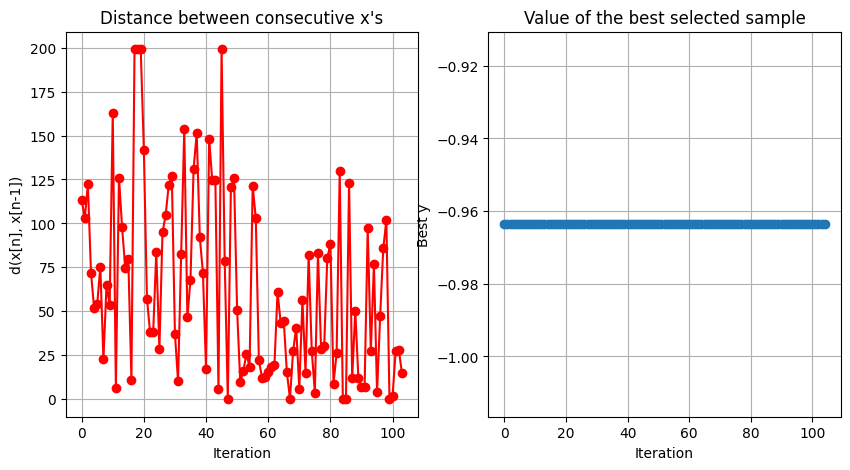

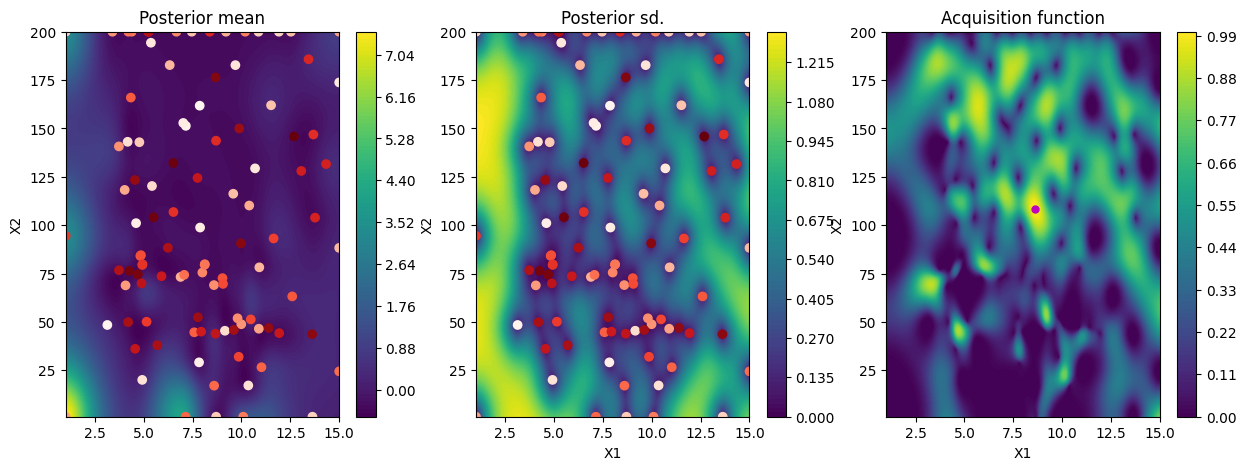

In [ ]:
#RF Classification - Matern52 kernel
kernelM = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0,active_dims=[0]) * GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0,active_dims=[1])
BO(rf_score,kernelM)

In [ ]:
meanacc=[]
for i in range(5):
  rf_car = RandomForestClassifier(max_features=8,n_estimators=162)
  rf_car.fit(X_train,y_train)
  y_pred = rf_car.predict(X_test)
  accuracy_test = accuracy_score(y_pred,y_test)
  print(accuracy_test)
  meanacc.append(accuracy_test)

print("mean accuracy",np.mean(meanacc))

0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9571428571428572
mean accuracy 0.9571428571428571


-0.9694852941176471
[ 4.75190215 29.13913221]


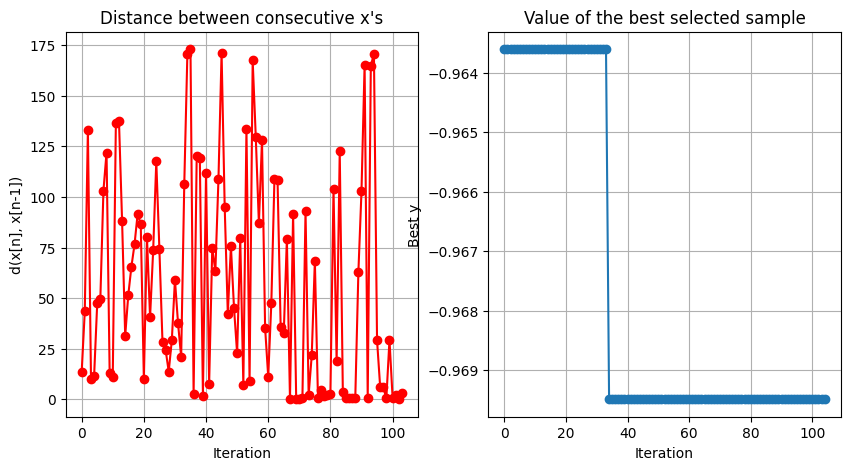

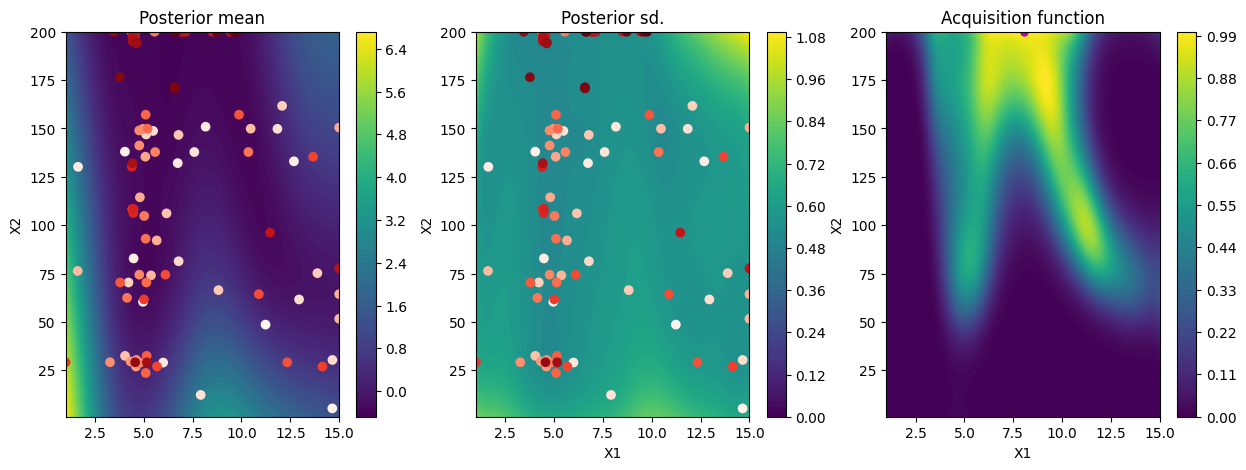

In [ ]:
#RF Classification - Custom kernel
kernel1 = GPy.kern.Matern52(input_dim=1,variance=1.8,lengthscale=1.724,active_dims=[0])
kernel2 = GPy.kern.Matern52(input_dim=1,variance=0.7,lengthscale=2.072,active_dims=[1])
kernel3 = GPy.kern.Matern52(input_dim=1,variance=1.5,lengthscale=1.724,active_dims=[0]) \
        * GPy.kern.Matern52(input_dim=1,variance=1,lengthscale=2.072,active_dims=[1])
kernelR = kernel1 + kernel2 + kernel3
BO(rf_score,kernelR)

In [ ]:
meanacc=[]
for i in range(5):
  rf_car = RandomForestClassifier(max_features=5,n_estimators=29)
  rf_car.fit(X_train,y_train)
  y_pred = rf_car.predict(X_test)
  accuracy_test = accuracy_score(y_pred,y_test)
  print(accuracy_test)
  meanacc.append(accuracy_test)

print("mean accuracy",np.mean(meanacc))

0.9571428571428572
0.9571428571428572
0.9428571428571428
0.9714285714285714
0.9571428571428572
mean accuracy 0.9571428571428571


In [ ]:
#SVM Classification

bounds = [ {'name': 'C', 'type': 'continuous', 'domain': (0.1, 100)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0.01, 1)}
      ]


def svm_score(parameters):
  params = {
        'C': parameters[0][0],
        'gamma': parameters[0][1]
    }
  
  clf = svm.SVC(C=params['C'],gamma=params['gamma'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)

  return score

-0.9694852941176471
[3.35189008e+01 1.00000000e-02]


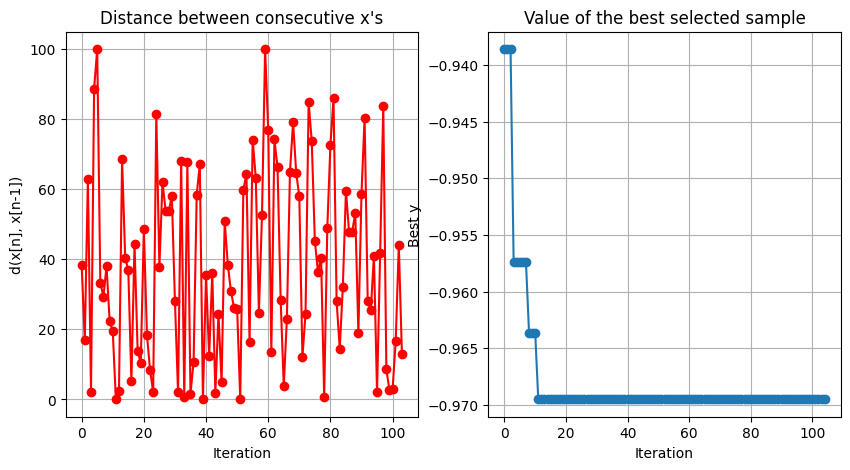

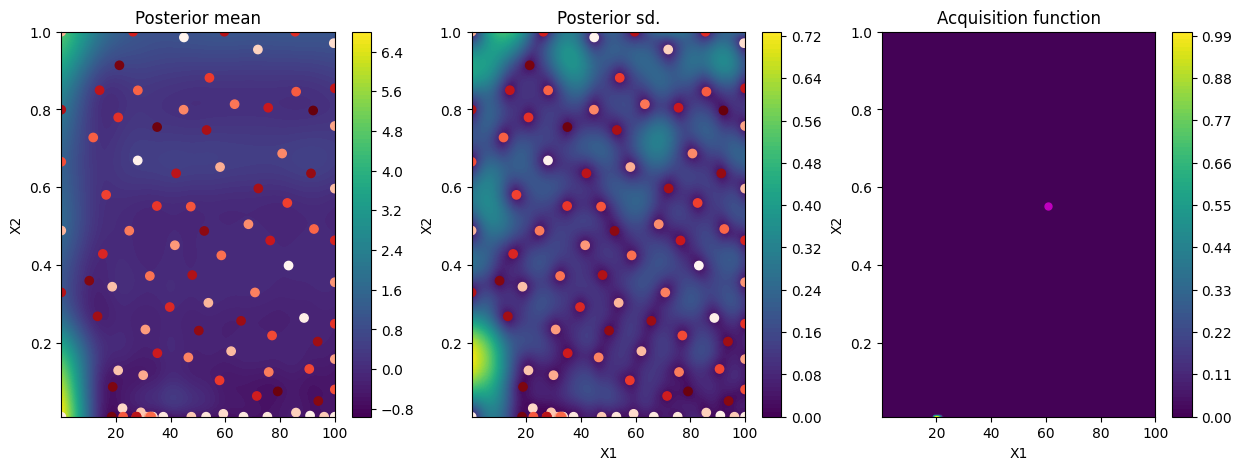

In [ ]:
#SVM Classification - Matern52 kernel
kernel1 = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0,active_dims=[0]) * GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0,active_dims=[1])
BO(svm_score,kernel1)

In [ ]:
meanacc=[]
for i in range(5):
  svm_car = svm.SVC(C=3.35189008e+01,gamma=1.00000000e-02)
  svm_car.fit(X_train,y_train)
  y_pred = svm_car.predict(X_test)
  accuracy_test = accuracy_score(y_pred,y_test)
  print(accuracy_test)
  meanacc.append(accuracy_test)

print("mean accuracy",np.mean(meanacc))

0.9714285714285714
0.9714285714285714
0.9714285714285714
0.9714285714285714
0.9714285714285714
mean accuracy 0.9714285714285713


-0.9694852941176471
[1.13275779e+01 1.00000000e-02]


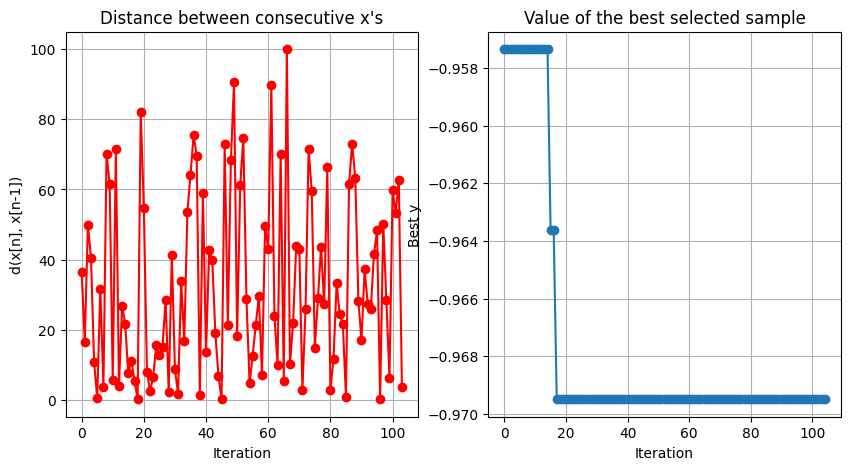

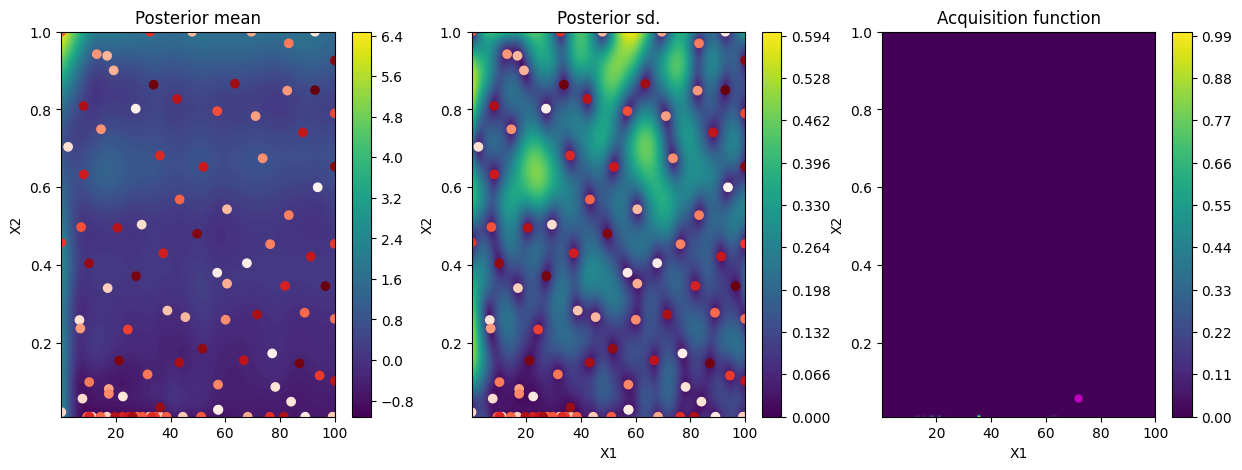

In [ ]:
#SVM Classification - Custom kernel
kernelS = GPy.kern.Matern52(input_dim=1, variance=2.8, lengthscale=1.376,active_dims=[0]) * GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.724,active_dims=[1])
BO(svm_score,kernelS)

In [ ]:
meanacc=[]
for i in range(5):
  svm_car = svm.SVC(C=1.13275779e+01,gamma=1.00000000e-02)
  svm_car.fit(X_train,y_train)
  y_pred = svm_car.predict(X_test)
  accuracy_test = accuracy_score(y_pred,y_test)
  print(accuracy_test)
  meanacc.append(accuracy_test)

print("mean accuracy",np.mean(meanacc))

0.9714285714285714
0.9714285714285714
0.9714285714285714
0.9714285714285714
0.9714285714285714
mean accuracy 0.9714285714285713


In [ ]:
#KNN Classification

#search domain
bounds = [ {'name': 'leaf_size', 'type': 'continuous', 'domain': (1, 100)},
        {'name': 'n_neighbors', 'type': 'discrete', 'domain': (3,4,5,6,7)}
      ]


def knn_score(parameters):
  params = {
        'leaf_size': int(parameters[0][0]),
        'n_neighbors':int(parameters[0][1])
    }
  
  clf = KNeighborsClassifier(leaf_size=params['leaf_size'],n_neighbors=params['n_neighbors'])
  clf.fit(X_train,y_train)
  score = kfold_score(clf,X_train, y_train,10)

  return score

In [ ]:
#KNN Classification - Matern52 kernel
kernelK = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0,active_dims=[0]) * GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0,active_dims=[1])
BO(knn_score,kernelK)

AttributeError: ignored

In [ ]:
meanacc=[]
for i in range(5):
  knn_car = KNeighborsClassifier(leaf_size=71,n_neighbors=7)
  knn_car.fit(X_train,y_train)
  y_pred = knn_car.predict(X_test)
  accuracy_test = accuracy_score(y_pred,y_test)
  print(accuracy_test)
  meanacc.append(accuracy_test)

print("mean accuracy",np.mean(meanacc))

0.9344894026974951
0.9344894026974951
0.9344894026974951
0.9344894026974951
0.9344894026974951
mean accuracy 0.9344894026974953


-0.9136029411764707
[23.35488104  4.        ]


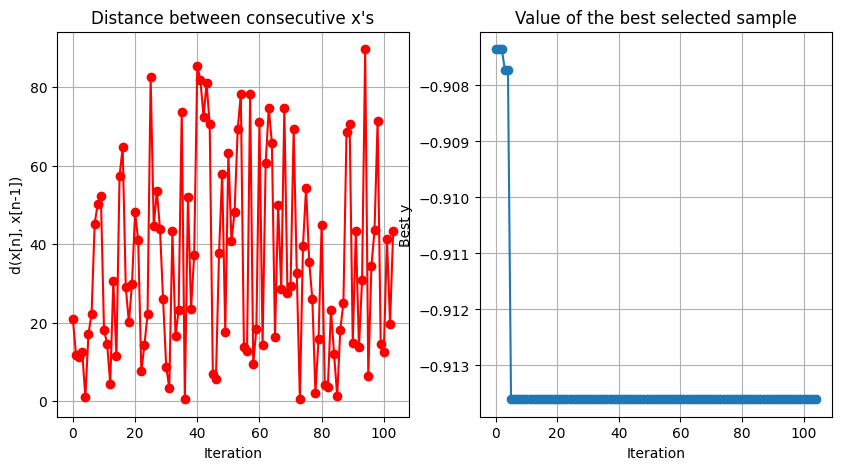

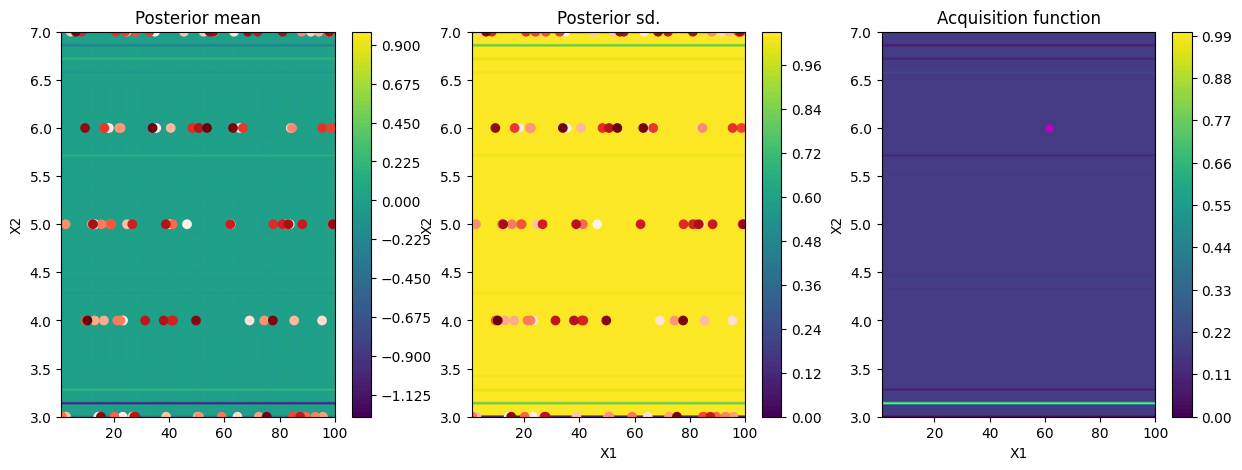

In [ ]:
kernel1 = GPy.kern.StdPeriodic(input_dim=1,variance=0.4,lengthscale=1.782,active_dims=[0],period=13) \
          * GPy.kern.Matern52(input_dim=1,lengthscale=0.506,active_dims=[0])
kernel2 = GPy.kern.StdPeriodic(input_dim=1,variance=0.7,lengthscale=1.579,active_dims=[1],period=2)
kernelK = kernel1 + kernel2
BO(knn_score,kernelK)

In [ ]:
meanacc=[]
for i in range(5):
  knn_car = KNeighborsClassifier(leaf_size=100,n_neighbors=7)
  knn_car.fit(X_train,y_train)
  y_pred = knn_car.predict(X_test)
  accuracy_test = accuracy_score(y_pred,y_test)
  print(accuracy_test)
  meanacc.append(accuracy_test)

print("mean accuracy",np.mean(meanacc))

0.9267822736030829
0.9267822736030829
0.9267822736030829
0.9267822736030829
0.9267822736030829
mean accuracy 0.9267822736030829
